In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("Total.csv")

In [3]:
# Viewing the data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Checking for missing values and percentage of missing values in all columns
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing values:\n", missing_values)
print("Missing percentage:\n", missing_percentage)

Missing values:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Missing percentage:
 battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64


In [5]:
continuous_vars = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
categorical_vars = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi','price_range']


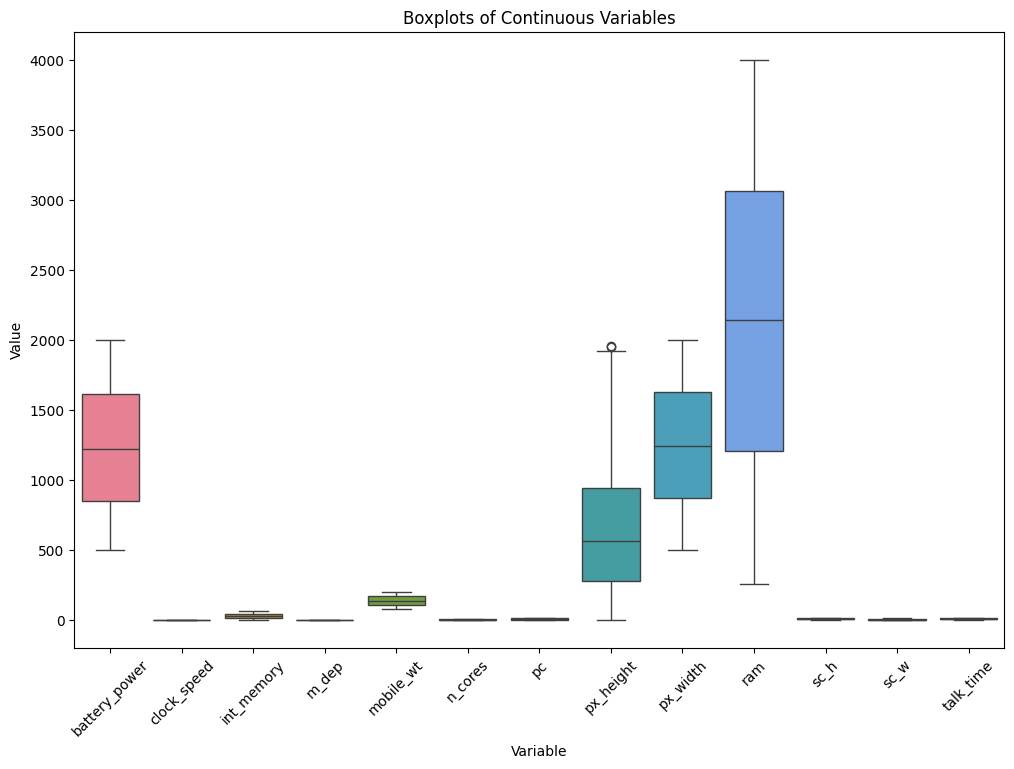

In [6]:
# Checking for outliers using boxplots
# Boxplot for all continuous variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[continuous_vars])
plt.title('Boxplots of Continuous Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [7]:
#Clamping to remove outliers in px_height
# Calculating the 1st quartile (Q1) of px_height
px_height_q1 = df['px_height'].quantile(0.25)

# Calculating the Q2 quartile (Q2) of px_height
px_height_q2 = df['px_height'].quantile(0.50)

# Calculating the 3RD quartile (Q3) of px_height
px_height_q3 = df['px_height'].quantile(0.75)

# Calculating the Interquartile Range (IQR) for outlier detection
px_height_iqr = px_height_q3 - px_height_q1

# Defining the lower bound for potential outliers (1.5 IQR below Q1)
px_height_bp_min = px_height_q1 - 1.5*px_height_iqr

# Defining the upper bound for potential outliers (1.5 IQR above Q3)
px_height_bp_max = px_height_q3 + 1.5*px_height_iqr

# Clipping outliers in px_height's column
df['px_height'] = df['px_height'].clip(lower = px_height_bp_min, upper = px_height_bp_max)

In [8]:
# Converting the binary columns to categorical
df[categorical_vars] = df[categorical_vars].astype('category')

In [9]:
# Checking summary statistics for the continuous variables
print("Summary statistics for continuous variables:\n", df[continuous_vars].describe())

Summary statistics for continuous variables:
        battery_power  clock_speed   int_memory        m_dep    mobile_wt  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     1.522250    32.046500     0.501750   140.249000   
std       439.418206     0.816004    18.145715     0.288416    35.399655   
min       501.000000     0.500000     2.000000     0.100000    80.000000   
25%       851.750000     0.700000    16.000000     0.200000   109.000000   
50%      1226.000000     1.500000    32.000000     0.500000   141.000000   
75%      1615.250000     2.200000    48.000000     0.800000   170.000000   
max      1998.000000     3.000000    64.000000     1.000000   200.000000   

           n_cores           pc    px_height     px_width          ram  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      4.520500     9.916500   645.097500  1251.515500  2124.213000   
std       2.287837     6.064315   443.749904   

In [10]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset

# Define the continuous variables
continuous_vars = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt',
                   'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Calculate summary statistics for continuous variables
summary_stats = df[continuous_vars].describe().transpose()

# Format the table for easy copying into Excel or Word
summary_stats_table = summary_stats.to_string(index=False)

# Print the formatted table
print("Summary statistics for continuous variables (Transposed):")
print(summary_stats_table)


Summary statistics for continuous variables (Transposed):
 count       mean         std   min     25%    50%     75%    max
2000.0 1238.51850  439.418206 501.0  851.75 1226.0 1615.25 1998.0
2000.0    1.52225    0.816004   0.5    0.70    1.5    2.20    3.0
2000.0   32.04650   18.145715   2.0   16.00   32.0   48.00   64.0
2000.0    0.50175    0.288416   0.1    0.20    0.5    0.80    1.0
2000.0  140.24900   35.399655  80.0  109.00  141.0  170.00  200.0
2000.0    4.52050    2.287837   1.0    3.00    4.0    7.00    8.0
2000.0    9.91650    6.064315   0.0    5.00   10.0   15.00   20.0
2000.0  645.09750  443.749904   0.0  282.75  564.0  947.25 1944.0
2000.0 1251.51550  432.199447 500.0  874.75 1247.0 1633.00 1998.0
2000.0 2124.21300 1084.732044 256.0 1207.50 2146.5 3064.50 3998.0
2000.0   12.30650    4.213245   5.0    9.00   12.0   16.00   19.0
2000.0    5.76700    4.356398   0.0    2.00    5.0    9.00   18.0
2000.0   11.01100    5.463955   2.0    6.00   11.0   16.00   20.0


In [11]:
# Cardinality for categorical features
cardinality_categorical = df[categorical_vars].nunique()

# Mode, mode frequency, and mode percentage for categorical features
mode_categorical = df[categorical_vars].mode().transpose()
mode_freq_categorical = df[categorical_vars].apply(lambda x: x.value_counts().iloc[0])
mode_percent_categorical = (mode_freq_categorical / len(df)) * 100

# Second mode, second mode frequency, and second mode percentage for categorical features
second_mode_categorical = df[categorical_vars].apply(lambda x: x.value_counts().index[1] if len(x.value_counts()) > 1 else None)
second_mode_freq_categorical = df[categorical_vars].apply(lambda x: x.value_counts().iloc[1] if len(x.value_counts()) > 1 else None)
second_mode_percent_categorical = (second_mode_freq_categorical / len(df)) * 100

# Displaying summary tables for categorical features
print("Summary Statistics for Categorical Features:")
print("\nCardinality:")
print(cardinality_categorical)
print("\nMode, Mode Frequency, and Mode Percentage:")
print(mode_categorical)
print(mode_freq_categorical)
print(mode_percent_categorical)
print("\nSecond Mode, Second Mode Frequency, and Second Mode Percentage:")
print(second_mode_categorical)
print(second_mode_freq_categorical)
print(second_mode_percent_categorical)


Summary Statistics for Categorical Features:

Cardinality:
blue            2
dual_sim        2
four_g          2
three_g         2
touch_screen    2
wifi            2
price_range     4
dtype: int64

Mode, Mode Frequency, and Mode Percentage:
              0                    1                    2                    3
blue          0 -9223372036854775808 -9223372036854775808 -9223372036854775808
dual_sim      1 -9223372036854775808 -9223372036854775808 -9223372036854775808
four_g        1 -9223372036854775808 -9223372036854775808 -9223372036854775808
three_g       1 -9223372036854775808 -9223372036854775808 -9223372036854775808
touch_screen  1 -9223372036854775808 -9223372036854775808 -9223372036854775808
wifi          1 -9223372036854775808 -9223372036854775808 -9223372036854775808
price_range   0                    1                    2                    3
blue            1010
dual_sim        1019
four_g          1043
three_g         1523
touch_screen    1006
wifi            1014


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df.drop(columns='price_range'), df['price_range'])

# Get feature importances
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": df.columns.drop('price_range'), "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)


          Feature  Importance
13            ram    0.494163
0   battery_power    0.074602
12       px_width    0.057448
11      px_height    0.055640
8       mobile_wt    0.038960
6      int_memory    0.034699
16      talk_time    0.030347
15           sc_w    0.027892
10             pc    0.027459
14           sc_h    0.026547
2     clock_speed    0.026069
4              fc    0.024274
7           m_dep    0.023293
9         n_cores    0.022036
18   touch_screen    0.006620
3        dual_sim    0.006448
1            blue    0.006312
19           wifi    0.006255
5          four_g    0.006237
17        three_g    0.004702


In [13]:
# Shuffle the dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define high and moderate importance features
important_features = [
    'ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt',
    'int_memory', 'talk_time', 'sc_w', 'pc', 'sc_h', 'clock_speed',
    'fc', 'm_dep', 'n_cores'
]

# Create a new DataFrame with important features
df_important = df_shuffled[important_features + ['price_range']]

# Split the important features dataset
X_important = df_important.drop(columns='price_range')
y_important = df_important['price_range']

X_train_important, X_test_important, y_train_important, y_test_important = train_test_split(X_important, y_important, test_size=0.2, random_state=42)

# Train Decision Tree on important features dataset
dt_important = DecisionTreeClassifier(random_state=42)
dt_important.fit(X_train_important, y_train_important)

# Predictions and performance on important features dataset
y_pred_train_important = dt_important.predict(X_train_important)
y_pred_test_important = dt_important.predict(X_test_important)

accuracy_train_important = accuracy_score(y_train_important, y_pred_train_important)
accuracy_test_important = accuracy_score(y_test_important, y_pred_test_important)

print(f'Accuracy on training data (important features): {accuracy_train_important}')
print(f'Accuracy on test data (important features): {accuracy_test_important}')
print('Classification Report (Important Features):')
print(classification_report(y_test_important, y_pred_test_important))


Accuracy on training data (important features): 1.0
Accuracy on test data (important features): 0.8325
Classification Report (Important Features):
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        98
           1       0.78      0.81      0.80       101
           2       0.77      0.73      0.75       103
           3       0.86      0.89      0.87        98

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [14]:
# Shuffle the dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features (X) and target (y)
X = df_shuffled[important_features]
y = df_shuffled['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess numeric features (normalize)
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())

X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())


# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Train the classifier
knn.fit(X_train, y_train)

# Predictions
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("KNN Classifier Results (Important Features with Normalization and get_dummies Encoding)")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print('Important Features - Classification Report:')
print(classification_report(y_test, y_pred_test))

KNN Classifier Results (Important Features with Normalization and get_dummies Encoding)
Train Accuracy: 1.0
Test Accuracy: 0.6225
Important Features - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        98
           1       0.52      0.52      0.52       101
           2       0.54      0.50      0.52       103
           3       0.68      0.77      0.72        98

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400



In [15]:
#MLP FOR JUST IMPORTANT DATASET

# Shuffle the dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features (X) and target (y)
X = df_shuffled[important_features]
y = df_shuffled['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess numeric features (normalize)
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())

X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

# Train MLP classifier on the important features dataset
mlp_important = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_important.fit(X_train, y_train)

# Predictions and performance on the important features dataset
y_pred_train_important = mlp_important.predict(X_train)
y_pred_test_important = mlp_important.predict(X_test)

accuracy_train_important = accuracy_score(y_train_important, y_pred_train_important)
accuracy_test_important = accuracy_score(y_test_important, y_pred_test_important)

print(f'Important Features - Accuracy on training data: {accuracy_train_important}')
print(f'Important Features - Accuracy on test data: {accuracy_test_important}')
print('Important Features - Classification Report:')
print(classification_report(y_test_important, y_pred_test_important))


Important Features - Accuracy on training data: 0.991875
Important Features - Accuracy on test data: 0.965
Important Features - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        98
           1       0.97      0.94      0.95       101
           2       0.96      0.96      0.96       103
           3       0.97      0.98      0.97        98

    accuracy                           0.96       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.96      0.96       400



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
